In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
cols = ['survived', 'pclass', 'who', 'embarked']
titanic.drop(cols, axis=1, inplace=True)

In [5]:
titanic.head()

,sex,age,sibsp,parch,fare,class,adult_male,deck,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,True,NaN,Southampton,no,False
1,female,38.0,1,0,71.2833,First,False,C,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,False,NaN,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,False,C,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,True,NaN,Southampton,no,True


##### How Many adult males are alive?

In [10]:
titanic[titanic['alive'] == "yes"]['adult_male'].value_counts()

False    254
True      88
Name: adult_male, dtype: int64

In [12]:
titanic['adult_male'].value_counts()

True     537
False    354
Name: adult_male, dtype: int64

##### Number of male/female travelling in which class and from which town

In [13]:
titanic.groupby(['embark_town','class','sex'])['age'].count()

embark_town  class   sex   
Cherbourg    First   female     38
                     male       36
             Second  female      7
                     male        8
             Third   female     16
                     male       25
Queenstown   First   female      1
                     male        1
             Second  female      1
                     male        1
             Third   female     10
                     male       14
Southampton  First   female     44
                     male       64
             Second  female     66
                     male       90
             Third   female     76
                     male      214
Name: age, dtype: int64

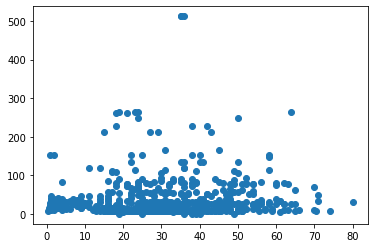

In [14]:
plt.plot(titanic['age'],titanic['fare'],'o')

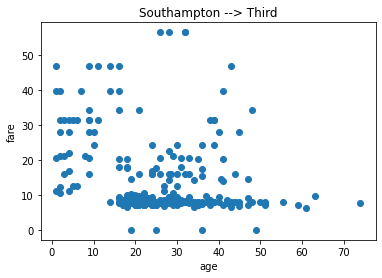

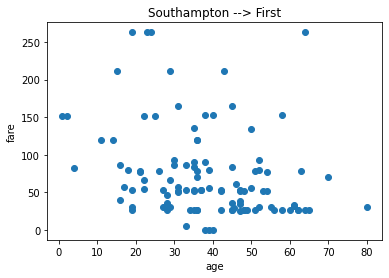

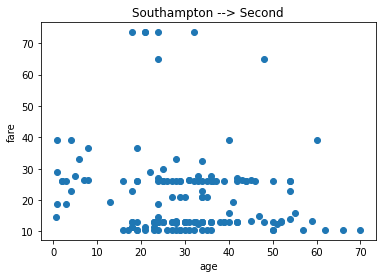

In [21]:
town = titanic['embark_town'].unique()[0]
for cls in titanic['class'].unique():
    temp = titanic[(titanic['embark_town'] == town) & (titanic['class'] ==cls)]
    plt.plot(temp['age'], temp['fare'], 'o')
    plt.title(f"{town} --> {cls}")
    plt.xlabel("age")
    plt.ylabel("fare")
    plt.show()
    

### Does being alive impacts with sibsp or parch???

In [28]:
titanic.groupby(['sibsp'])['alive'].value_counts()

sibsp  alive
0      no       398
       yes      210
1      yes      112
       no        97
2      no        15
       yes       13
3      no        12
       yes        4
4      no        15
       yes        3
5      no         5
8      no         7
Name: alive, dtype: int64

In [29]:
titanic.groupby(['parch'])['alive'].value_counts()

parch  alive
0      no       445
       yes      233
1      yes       65
       no        53
2      no        40
       yes       40
3      yes        3
       no         2
4      no         4
5      no         4
       yes        1
6      no         1
Name: alive, dtype: int64

In [30]:
titanic[titanic['age'].apply(lambda x:True if x>35 else False)]

,sex,age,sibsp,parch,fare,class,adult_male,deck,embark_town,alive,alone
1,female,38.0,1,0,71.2833,First,False,C,Cherbourg,yes,False
6,male,54.0,0,0,51.8625,First,True,E,Southampton,no,True
11,female,58.0,0,0,26.5500,First,False,C,Southampton,yes,True
13,male,39.0,1,5,31.2750,Third,True,NaN,Southampton,no,False
15,female,55.0,0,0,16.0000,Second,False,NaN,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...
865,female,42.0,0,0,13.0000,Second,False,NaN,Southampton,yes,True
871,female,47.0,1,1,52.5542,First,False,D,Southampton,yes,False
873,male,47.0,0,0,9.0000,Third,True,NaN,Southampton,no,True
879,female,56.0,0,1,83.1583,First,False,C,Cherbourg,yes,False
